## 1. Instalasi Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Import Dataset 

In [2]:
df = pd.read_excel('Dataset.xlsx')
print(df)

       BB    TB  Usia Gizi  Kelamin
0    14.8  98.8    47    N        1
1    13.7  95.3    31    N        1
2    12.5  93.5    28   GK        1
3    13.4  93.0    27    N        1
4    13.8  92.0    24    N        1
..    ...   ...   ...  ...      ...
331  10.0  82.3    26    N        0
332  10.2  82.3    26    N        0
333  11.0  81.8    25    N        0
334  10.3  81.0    25    N        0
335  10.5  80.0    24    N        0

[336 rows x 5 columns]


## 3. Analisis Dataset 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BB       336 non-null    float64
 1   TB       336 non-null    float64
 2   Usia     336 non-null    int64  
 3   Gizi     336 non-null    object 
 4   Kelamin  336 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
df.describe()

,BB,TB,Usia,Kelamin
count,336.000000,336.000000,336.000000,336.000000
mean,12.672768,88.766369,31.785714,0.535714
std,4.294520,14.633459,19.204211,0.499467
min,3.800000,52.000000,1.000000,0.000000
25%,9.575000,76.950000,15.000000,0.000000
50%,12.300000,89.200000,31.000000,1.000000
75%,15.300000,100.000000,47.000000,1.000000
max,36.100000,128.000000,72.000000,1.000000


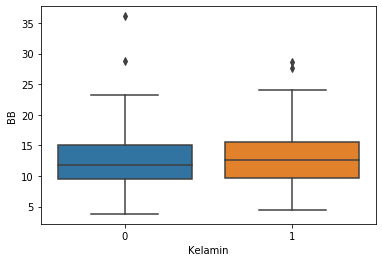

In [5]:
sns.boxplot(x='Kelamin',y='BB',data=df)

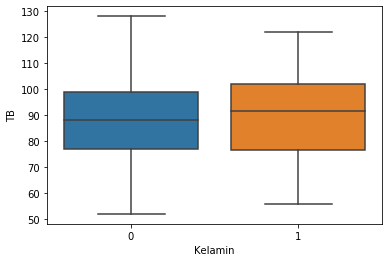

In [6]:
sns.boxplot(x='Kelamin',y='TB',data=df)

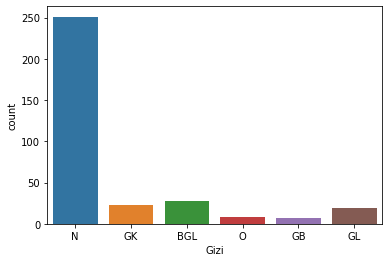

In [7]:
sns.countplot(x='Gizi', data=df)

## 4. Pemilihan Variabel dalam untuk klasifikasi 

In [16]:
x = df[['BB','TB','Usia','Kelamin']]
y = df['Gizi']

## 5. Normalisasi Data 

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [19]:
x_scaled

array([[ 0.49607513,  0.68668627,  0.79341854,  0.93094934],
       [ 0.23955275,  0.44715166, -0.04097467,  0.93094934],
       [-0.04028984,  0.32396242, -0.19742339,  0.93094934],
       ...,
       [-0.39009307, -0.47676759, -0.35387212, -1.07417231],
       [-0.55333459, -0.53151836, -0.35387212, -1.07417231],
       [-0.50669415, -0.59995682, -0.40602169, -1.07417231]])

## 6. Pembagian data test dan train 

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)

## 7. Klasifikasi Menggunakan Algoritma RandomForestClassifier 

In [11]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
train = clf.fit(x_train, y_train)
pred = train.predict(x_test)

## 8. Hasil Prediksi

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8235294117647058

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[ 1,  1,  0,  3],
       [ 0,  0,  0,  3],
       [ 2,  0,  1,  3],
       [ 0,  0,  0, 54]], dtype=int64)

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         BGL       0.33      0.20      0.25         5
          GK       0.00      0.00      0.00         3
          GL       1.00      0.17      0.29         6
           N       0.86      1.00      0.92        54

    accuracy                           0.82        68
   macro avg       0.55      0.34      0.36        68
weighted avg       0.79      0.82      0.78        68

